In [18]:
$X - Y$

SyntaxError: ignored

$(\sum (E_i)^2)^{1/2}$

$\sum |E_i|$

# Column Subset Selection Problem

##Intro

### Linear regression

$X, Y \in 	\mathbb{R}^m$

$ \widetilde Y  = kX + b : k,b = argmin_{k,b} || Y - \widetilde Y  || _2$

### Centration

If $ \overline X = 0$ and $ \overline Y = 0$, then $b = 0$, then $ \widetilde Y  = kX  $

Generally: 

$\widetilde Y - \overline Y = k(X - \overline X) $

$\widetilde Y  = k X - k\overline X + \overline Y$

$b = \overline Y -  k\overline X$

## Multivariate case

$X \in 	\mathbb{R}^{m \times n}, Y \in 	\mathbb{R}^{m \times k}$

$ \widetilde Y  =  X K: K \in 	\mathbb{R}^{n \times k}, K=argmin_{K} || Y - \widetilde Y  || _F$

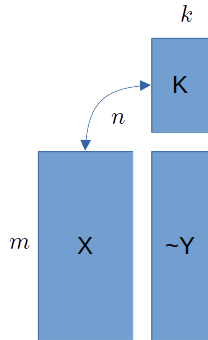


$K = X^{+}Y$, where $X^{+}$ - is Moore-Penrose pseudoinverse, `np.linalg.pinv()`





## Column Subset Selection Problem

Let $ A \in \mathbb{R}^{m \times n}$, $r < n$

> Find subset of $r$ columns of A ($X \in \mathbb{R}^{m \times r}$) such that the rest $n-r$ columns ($Y \in \mathbb{R}^{m \times (n-r)}$) could be linearly approximated with the smallest error [in the sense of Frobenius norm _aka_ least squares].

There are $\frac{n!} {r! (n-r)!}$ ways to select $r$ columns out of $n$.

## Rank-revealing QR decomposition (RRQR)

### QR decomposition

$A = QR$

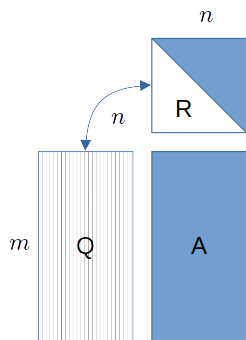


## RRQR

$PA = QR$

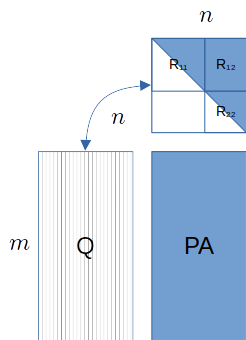

## RRQR for CSSP

First $r$ columns of $PA$ are the best candidates for solution of CSSP.

# RRQR in LAPACK, LAPACK in SciPY

[DGEQP3](https://netlib.org/lapack/explore-html/dd/d9a/group__double_g_ecomputational_ga1b0500f49e03d2771b797c6e88adabbb.html)

[scipy.linalg.lapack.dgeqp3](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lapack.dgeqp3.html)

## General algorithm

1. Find $P$ for $PA=QR$ via `DGEQP3`
2. Set $X = (PA)_{:,:r}$, $Y = (PA)_{:,r:}$
3. Find $K = X^+Y$ via `np.linalg.pinv`
4. Find centration correction $k_0$





In [2]:
import numpy as np
from scipy.linalg.lapack import dgeqp3


In [3]:
def cssp(A, r):
  _, P, _, _, info = dgeqp3(A)
  assert info==0
  P -= 1 # 1-based index from dgeqp3
  K = np.linalg.pinv(A[:, P[:r]]) @ A[:, P[r:]]
  return P, K

def cssp_fit(A, r):
  b = np.mean(A, axis=0)
  P, K = cssp(A-b[None, :], r)
  k0 = b[P[r:]] - b[P[:r]] @ K
  return P, K, k0


# $Pd / CO_2$ 

In [5]:
import pandas as pd
df = pd.read_csv("Pd_CO2.csv", delimiter=",", encoding="ISO-8859-1", index_col=0)
df

,Eads of CO2 /eV,Eads of CO2- /eV,Eads of HCOO /eV,Eads of HCOOH /eV,Eads of H2COOH /eV,Eads of CH2O /eV,Eads of CH3O /eV,Eads of CH3OH /eV,Surface energy /Jm^-2
Surface,,,,,,,,,
Pd (100),-0.183608,-0.127312,-2.732308,-0.670896,-2.347647,-0.926390,-2.353089,-0.573661,1.91
Pd (110),-0.162321,-0.227370,-2.903095,-0.538165,-2.404782,-1.048041,-2.173203,-0.712622,1.99
Pd (111),-0.208814,0.056009,-2.654076,-0.671991,-2.109862,-0.752050,-2.126275,-0.577560,1.72


In [19]:
A = df.to_numpy()
r = 1
P, K, k0 = cssp_fit(A, r)

print ("X columns: ", "\n    ".join(df.columns.values[P[:r]]))
print ("Y columns: ", df.columns.values[P[r:]])
# Errors check
X = A[:, P[:r]]
Y = A[:, P[r:]]
Ypred = X @ K + k0[None, :]
errs = np.linalg.norm( Ypred - Y, axis=0)
print ("Errors:", errs)

X columns:  Eads of H2COOH /eV
Y columns:  ['Eads of CH3O /eV' 'Eads of CH2O /eV' 'Eads of HCOOH /eV'
 'Eads of CO2 /eV' 'Eads of HCOO /eV' 'Eads of CO2- /eV'
 'Eads of CH3OH /eV' 'Surface energy /Jm^-2']
Errors: [0.14547039 0.04950351 0.08221623 0.00945288 0.0943319  0.03476234
 0.08682773 0.02131738]


In [20]:
P

array([4, 6, 5, 3, 0, 2, 1, 7, 8], dtype=int32)



---



---



In [21]:
m = 5
n = 6

A = np.random.random((m, n))
print (A)

[[0.64637488 0.55015753 0.07960487 0.66521376 0.98643871 0.17178341]
 [0.38467939 0.35156213 0.31304163 0.23683026 0.16882614 0.69919758]
 [0.92102435 0.29961283 0.60102792 0.2309873  0.47545249 0.56008627]
 [0.49274267 0.00753099 0.43954437 0.79391668 0.9115336  0.16339569]
 [0.6278973  0.23967104 0.34726527 0.22529622 0.12225918 0.47901724]]


In [29]:
r = 3

P, K, k0 = cssp_fit(A, r)
print (P)
print (K)
print (k0)


[4 0 1 5 3 2]
[[-0.53165421  0.64940414 -0.15099474]
 [ 0.08072209 -0.41355694  0.56869772]
 [ 0.16651412 -0.24719297 -0.72492662]]
[0.6001681  0.41014239 0.29708885]


In [30]:
X = A[:, P[:r]]
Y = A[:, P[r:]]
np.linalg.norm( (X @ K + k0[None, :]) - Y, axis=0)

array([0.20377117, 0.07592137, 0.15927726])

In [31]:
%matplotlib inline
import  matplotlib.pylab  as plt

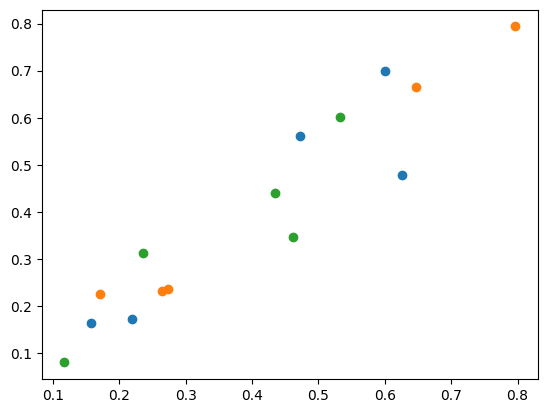

In [32]:
for i in range(n-r):
  plt.scatter( (X @ K  + k0[None, :] )[:, i], Y[:, i])
plt.show()